In [1]:
# Copyright (C) 2021-2022 Katherine Xie - All Rights Reserved.

# Generates figures to display results of my research
# Author: Katherine Xie
# Version 2.0 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import random
import pickle
import scipy.stats as st
import itertools 
import seaborn as sns

# Filters dataframe based on neuron type. 
# Establishes a synapse threshold of greater than 1
# data - the dataframe
# col_substr - regex to select for substrings that represent neuron type in columns
# row_substr - regex to select for substrings that represent neuron type in rows
# row_header - header for indices
def filter_neuron_types(data, col_substr, row_substr, idx_header):
    first_column = df.iloc[:, 0] # gets first column to use as row indices
    # columns
    new_df = data.filter(regex=col_substr, axis='columns') 
    
    # rows
    new_df.insert(0, idx_header, first_column, True) # inserts column with row labels into the new dataframe
    new_df.set_index(idx_header, inplace=True) # sets inserted column as dataframe indicies
    new_df = new_df.filter(regex=row_substr, axis='index')
    
    # establishing a threshold of num synapses > 1 to count as a connection
    num_rows = len(new_df)
    # loops thru rows of new_df
    for i in range(num_rows):
        row = new_df.iloc[i] # gets row
        new_row = np.where(row == 1, 0, row) # if synaspse num = 1, change to 0
        new_df.iloc[i] = new_row
    
    return new_df

# Normalizes weights by column's sum in a pandas df
# df - dataframe
# sum_of_w - the sum of the weights
def normalize_weights_df(df, sum_of_w):
    col = len(df.columns)
    #df.iloc[:,0:col] = df.iloc[:,0:col].apply(lambda x: x / np.linalg.norm(x), axis=0)
    #df = normalize(df, axis=0, norm='l1') # normalize by column to sum of 1
    for c in range(col):
        w = df.iloc[:,c]
        s = sum(abs(w)) # sum of column
        if (s != 0):
            df.iloc[:,c] = [i/s for i in w]
    return sum_of_w * df

# Normalizes weights by column's sum in a numpy array
# arr - numpy array
# sum_of_w - the sum of the weights
def normalize_weights_np(arr, sum_of_w):
    col = len(arr[0])
    #df.iloc[:,0:col] = df.iloc[:,0:col].apply(lambda x: x / np.linalg.norm(x), axis=0)
    #df = normalize(df, axis=0, norm='l1') # normalize by column to sum of 1
    for c in range(col):
        w = arr[:,c]
        s = sum(abs(w)) # sum of column
        if (s != 0):
            arr[:,c] = [i/s for i in w]
    return sum_of_w * arr

# get the number kc from string arr
# a - num kcs removed
def get_num_kc(string, a):
    nums = np.zeros(a)
    for i in range(a):
        end = False
        s = string[i]
        j = 1
        num_str = ""
        while end == False:
            # end loop if space is reached
            if s[-j] == " ": 
                end = True
            else:
                num_str = s[-j] + num_str
            j += 1
        nums[i] = int(num_str)
    return nums

# mbon - index of mbon
def count_num_removed(kc_mbon, nums, mbon):
    count = 0
    nums = nums.astype(int)
    for i in range(len(nums)):
        if kc_mbon.iloc[nums[i], mbon] != 0:
            count += 1
    return count


df = pd.read_csv('connectivity matrix table 1.csv') # matrix of connections between neurons

# FILTER DATA FOR PNs (rows) to KCs (columns) CONNECTIONS -> pn_kc
pn_kc = filter_neuron_types(df, "(?=.*KC)(?=.*left)", "(?=.*PN)(?=.*left)", "Presynaptic PNs") # filter w/ regex PNs and KCs

# normalize weights
pn_kc = normalize_weights_df(pn_kc, 1)

# FILTER DATA FOR KCs TO MBONs CONNECTIONS -> kc_to_mbon
kc_mbon = filter_neuron_types(df, "(?=.*MBON)(?=.*left)", "(?=.*KC)(?=.*left)", "Presynaptic KCs") # filter w/ regex for KCs and MBON lefts

# take out MBONs with no KC connections
kc_mbon = kc_mbon.drop(kc_mbon.loc[:, (kc_mbon.sum(axis=0) == 0)], axis=1)

# adding a fictional MBON
fict_weights = np.full(len(kc_mbon), 0.1) # initializing all weights at 0.1
kc_mbon['MBON-fict'] = fict_weights

# normalizing weights
kc_mbon = normalize_weights_df(kc_mbon, 1)
kc_mbon = kc_mbon.fillna(0)

# Set numbers
num_kcs = len(pn_kc.columns)
num_pns = len(pn_kc) # number of PNs (40), also = number of dimensions of the odor
num_mbons = len(kc_mbon.columns)
R = 20 # number of realizations of training
K = 23 # number of KC removal sets
T = 5000

# color palette (19 colors)
colors = ['steelblue', 'darkorange', 'forestgreen', 'crimson', 'mediumpurple', 'rosybrown', 
          'pink', 'goldenrod', 'darkturquoise', 'thistle', 'lightsteelblue', 'peachpuff', 
          'lightgreen', 'lightsalmon', 'sienna', 'orchid', 'gray', 'khaki', 'lightblue']

(23, 10, 5000, 19)


Text(0, 0.5, 'Average % Ablated per KC Type')

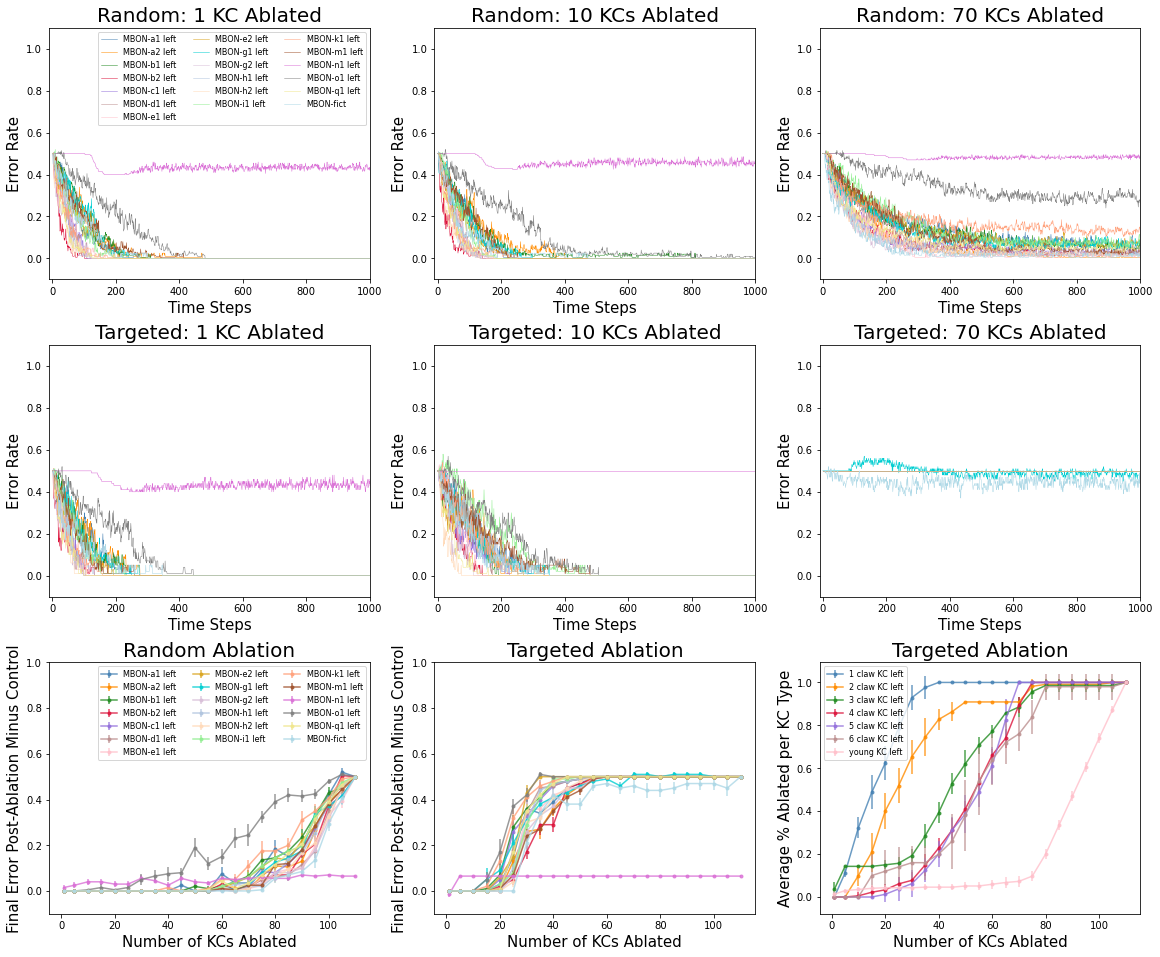

In [8]:
axis_fontsize = 15
title_fontsize = 20
legend_fontsize = 8
fig4 = plt.figure(figsize=(16,30), constrained_layout=True)
gs4 = fig4.add_gridspec(ncols=6, nrows=15)

# 4A ERROR OVER TIME (REMOVED 1) - RANDOM
f4_ax1 = fig4.add_subplot(gs4[6:8, 0:2])

# list of num of KCs removed
num_removed = np.ones(23)
num_removed[1:] = np.linspace(5, 110, 22)
num_removed = num_removed.astype(int)

with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/random-ablation/all-error-rates2.pkl', 'rb') as f:
    error_over_time1 = pickle.load(f)
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/random-ablation2/all-error-rates2.pkl', 'rb') as f:
    error_over_time2 = pickle.load(f) 

# concatenate arrays from both runs
r_error_rate_over_time = np.concatenate((error_over_time1, error_over_time2), axis = 1)

avg_error = np.mean(r_error_rate_over_time, axis=1)

x = np.linspace(0, 5000, 5000)

for i in range(num_mbons):
    f4_ax1.plot(x, avg_error[0, : ,i], label = kc_mbon.columns[i], linewidth = 0.5, color = colors[i])
    
f4_ax1.set_ylim(-0.1, 1.1)
f4_ax1.set_xlim(-10, 1000)
f4_ax1.legend(fontsize=legend_fontsize, loc=1, ncol=3)
f4_ax1.set_title("Random: {} KC Ablated".format(num_removed[0]), fontsize=title_fontsize)
f4_ax1.set_xlabel("Time Steps", fontsize=axis_fontsize)
f4_ax1.set_ylabel("Error Rate", fontsize=axis_fontsize)

# 4B ERROR OVER TIME (REMOVED 10) - RANDOM
f4_ax2 = fig4.add_subplot(gs4[6:8, 2:4])

for i in range(num_mbons):
    f4_ax2.plot(x, avg_error[2, :, i], label = kc_mbon.columns[i], linewidth = 0.5, color = colors[i])
    
f4_ax2.set_ylim(-0.1, 1.1)
f4_ax2.set_xlim(-10, 1000)
f4_ax2.set_title("Random: {} KCs Ablated".format(num_removed[2]), fontsize=title_fontsize)
f4_ax2.set_xlabel("Time Steps", fontsize=axis_fontsize)
f4_ax2.set_ylabel("Error Rate", fontsize=axis_fontsize)

# 4C ERROR OVER TIME (REMOVED 70) - RANDOM
f4_ax3 = fig4.add_subplot(gs4[6:8, 4:])

for i in range(num_mbons):
    f4_ax3.plot(x, avg_error[14, :, i], label = kc_mbon.columns[i], linewidth = 0.5, color = colors[i])
    
f4_ax3.set_ylim(-0.1, 1.1)
f4_ax3.set_xlim(-10, 1000)
f4_ax3.set_title("Random: {} KCs Ablated".format(num_removed[14]), fontsize=title_fontsize)
f4_ax3.set_xlabel("Time Steps", fontsize=axis_fontsize)
f4_ax3.set_ylabel("Error Rate", fontsize=axis_fontsize)

# 4D ERROR OVER TIME (REMOVED 1) - TARGETED
f4_ax4 = fig4.add_subplot(gs4[8:10, 0:2])

with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/rel-targeted-ablation/all-error-rates6.pkl', 'rb') as f:
    error_over_time = pickle.load(f)
    
print(error_over_time.shape)
    
# with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/rel-targeted-ablation2/all-error-rates6.pkl', 'rb') as f:
#     error_over_time2 = pickle.load(f)
    
# t_error_rate_over_time = np.concatenate((error_over_time1, error_over_time2), axis = 1)

avg_error = np.mean(error_over_time, axis=1)

x = np.linspace(0, 5000, 5000)

for i in range(num_mbons):
    f4_ax4.plot(x, avg_error[0, : ,i], label = kc_mbon.columns[i], linewidth = 0.5, color = colors[i])
    
f4_ax4.set_ylim(-0.1, 1.1)
f4_ax4.set_xlim(-10, 1000)
f4_ax4.set_title("Targeted: {} KC Ablated".format(num_removed[0]), fontsize=title_fontsize)
f4_ax4.set_xlabel("Time Steps", fontsize=axis_fontsize)
f4_ax4.set_ylabel("Error Rate", fontsize=axis_fontsize)

# 4E ERROR OVER TIME (REMOVED 10) - TARGETED
f4_ax5 = fig4.add_subplot(gs4[8:10, 2:4])

for i in range(num_mbons):
    f4_ax5.plot(x, avg_error[2, :, i], label = kc_mbon.columns[i], linewidth = 0.5, color = colors[i])
    
f4_ax5.set_ylim(-0.1, 1.1)
f4_ax5.set_xlim(-10, 1000)
f4_ax5.set_title("Targeted: {} KCs Ablated".format(num_removed[2]), fontsize=title_fontsize)
f4_ax5.set_xlabel("Time Steps", fontsize=axis_fontsize)
f4_ax5.set_ylabel("Error Rate", fontsize=axis_fontsize)

# 4F ERROR OVER TIME (REMOVED 70) - TARGETED
f4_ax6 = fig4.add_subplot(gs4[8:10, 4:])

for i in range(num_mbons):
    f4_ax6.plot(x, avg_error[14, :, i], label = kc_mbon.columns[i], linewidth = 0.5, color = colors[i])
    
f4_ax6.set_ylim(-0.1, 1.1)
f4_ax6.set_xlim(-10, 1000)
f4_ax6.set_title("Targeted: {} KCs Ablated".format(num_removed[14]), fontsize=title_fontsize)
f4_ax6.set_xlabel("Time Steps", fontsize=axis_fontsize)
f4_ax6.set_ylabel("Error Rate", fontsize=axis_fontsize)

# 4G ERROR VS NUM KCS ABLATED - RANDOM
f4_ax7 = fig4.add_subplot(gs4[10:12, 0:2])

num_mbons = 19
K = 23
T = 5000
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/control/all-error-rates1.pkl', 'rb') as f:
    error_over_time1 = pickle.load(f) # dimensions: R, T, num_mbons
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/control2/all-error-rates1.pkl', 'rb') as f:
    error_over_time2 = pickle.load(f)

# concatenate arrays from both runs
error_control = np.concatenate((error_over_time1, error_over_time2), axis = 0)

# x-axis -> number of KCs removed
numbers = np.ones(23)
numbers[1:] = np.linspace(5, 110, 22)
numbers = numbers.astype(int).tolist() 
x = []       
for i in range(num_mbons):
    for j in range(K):
        x.append(numbers[j])

# y-axis - avg final error rate
avg_error0 = np.mean(error_control, axis=0)
avg_error = np.zeros((K, T, num_mbons))
for i in range(K):
    avg_error[i] = np.mean(r_error_rate_over_time[i], axis=0)

std_y = np.zeros((K, T, num_mbons))
for i in range(K):
#     std_y[i] = np.std(r_error_rate_over_time[i], axis=0)
    std_y[i] = st.sem(r_error_rate_over_time[i], axis=0)

yerr = []
for k in range(num_mbons):
    for i in range(K):
        yerr.append(std_y[i,-1,k])
    
y = []
# add differences in ablation error rate and control
for k in range(num_mbons):
    for i in range(K):
        y.append(avg_error[i,-1,k] - avg_error0[-1,k])

# plot points with lines and labels
names = kc_mbon.columns
for p in range(num_mbons):
    start = p * K
    end = (p * K) + K
    f4_ax7.errorbar(x[start:end], y[start:end], yerr=yerr[start:end], fmt="o", ls='solid', alpha = 0.8, 
                    label=kc_mbon.columns[p], ms=3, c=colors[p])

f4_ax7.set_xlabel("Number of KCs Ablated", fontsize=axis_fontsize)
f4_ax7.set_ylabel("Final Error Post-Ablation Minus Control", fontsize=axis_fontsize)
f4_ax7.set_ylim(-0.1, 1.0)
f4_ax7.set_title("Random Ablation", fontsize=title_fontsize)
f4_ax7.legend(fontsize=legend_fontsize, loc=1, ncol=3)

# 4H ERROR VS NUM KCS ABLATED - TARGETED
f4_ax8 = fig4.add_subplot(gs4[10:12, 2:4])

# y-axis - avg final error rate
avg_error0 = np.mean(error_control, axis=0)
avg_error = np.zeros((K, T, num_mbons))
for i in range(K):
    avg_error[i] = np.mean(error_over_time[i], axis=0)

std_y = np.zeros((K, T, num_mbons))
for i in range(K):
#     std_y[i] = np.std(t_error_rate_over_time[i], axis=0)
    std_y[i] = st.sem(error_over_time[i], axis=0)

yerr = []
for k in range(num_mbons):
    for i in range(K):
        yerr.append(std_y[i,-1,k])
    
y = []
# add differences in ablation error rate and control
for k in range(num_mbons):
    for i in range(K):
        y.append(avg_error[i,-1,k] - avg_error0[-1,k])

# plot points with lines and labels
names = kc_mbon.columns
for p in range(num_mbons):
    start = p * K
    end = (p * K) + K
    f4_ax8.errorbar(x[start:end], y[start:end], yerr=yerr[start:end], fmt="o", ls='solid', alpha = 0.8, 
                     label=kc_mbon.columns[p], ms=3, c=colors[p])

f4_ax8.set_xlabel("Number of KCs Ablated", fontsize=axis_fontsize)
f4_ax8.set_ylabel("Final Error Post-Ablation Minus Control", fontsize=axis_fontsize)
f4_ax8.set_ylim(-0.1, 1.0)
f4_ax8.set_title("Targeted Ablation", fontsize=title_fontsize)

# 4I PERCENTAGE OF EACH KC TYPE ABLATED VS NUMBER ABLATED
f4_ax9 = fig4.add_subplot(gs4[10:12, 4:6])

# import data
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/rel-targeted-ablation/kcs-removed6.pkl', 'rb') as f:
    kc_names = pickle.load(f) # K, R, index of a KC removed

# with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/targeted-ablation2/kcs-removed3.pkl', 'rb') as f:
#     kc_names2 = pickle.load(f) # K, R, index of a KC removed

kc_names = np.array(kc_names, dtype='object')
# kc_names2 = np.array(kc_names2, dtype='object')

# kc_names = np.concatenate((kc_names1, kc_names2), axis = 1)

kc_types = ['1 claw KC left', '2 claw KC left', '3 claw KC left', '4 claw KC left', '5 claw KC left', 
         '6 claw KC left', 'young KC left']

# find number of each type of KC in the network
list_names = list(kc_mbon.index)
type_counts = np.zeros(7)
for t in range(7):
    type_counts[t] = list_names.count(kc_types[t])
    
# x-axis -> number of KCs removed
x = np.ones(23)
x[1:] = np.linspace(5, 110, 22)
x = x.astype(int)

# format names
R = 10
for r in range(R):
    for a in range(len(kc_names)):
        sub_list = kc_names[a][r] # r = realization
        for b in range(len(sub_list)):
            s = sub_list[b]
            idx = s.index('t') + 1 # index after t in "left"
            kc_names[a][r][b] = s[0:idx]

# y-axis -> percentage of each type out of the total number of kcs ablated
y = np.zeros((R, 7, K)) # 7 = number of KC types
for r in range(R):
    for k in range(K):
        names = kc_names[k][r] # the k removed KCs, for realization r
        for t in range(7):
            y[r, t, k] = names.count(kc_types[t]) / float(type_counts[t])
            
# plot averaged plot over the 10 realizations
# calculate average percentages across realizations
y_avg = np.mean(y, axis=0)

# calculate std of percentages across realizations
y_std = np.std(y, axis=0)

# plot
for t in range(7):
    f4_ax9.errorbar(x, y_avg[t], yerr=y_std[t], alpha=0.8, marker='.', label=kc_types[t], c=colors[t])
f4_ax9.set_title("Targeted Ablation", fontsize=title_fontsize)    
f4_ax9.legend(fontsize=legend_fontsize)
f4_ax9.set_xlabel("Number of KCs Ablated", fontsize=axis_fontsize)
f4_ax9.set_ylabel("Average % Ablated per KC Type", fontsize=axis_fontsize)

Text(0.5, 1.0, 'Targeted Ablation')

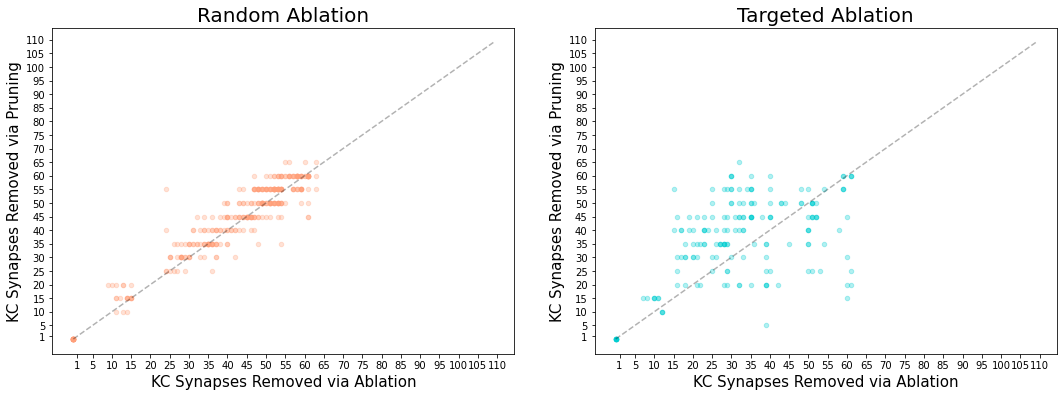

In [9]:
axis_fontsize = 15
title_fontsize = 20
legend_fontsize = 12
fig7 = plt.figure(figsize=(18,6), constrained_layout=False)
gs7 = fig7.add_gridspec(ncols=6, nrows=2)

gs7.update(wspace=0.8, hspace=0.4) # set the spacing between axes

R = 20
# NUMBER PRUNED VS ABLATED 
# 7A RANDOM (ER = 0.5)
f7_ax1 = fig7.add_subplot(gs7[0:2, 0:3])

# excluding the fictional MBON, there are 18 MBONs
num_mbons = 18

# import data
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/control/all-error-rates1.pkl', 'rb') as f:
    error_over_time1 = pickle.load(f) # dimensions: R, T, num_mbons
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/control2/all-error-rates1.pkl', 'rb') as f:
    error_over_time2 = pickle.load(f)

# concatenate arrays from both runs
error_control_p = np.concatenate((error_over_time1, error_over_time2), axis = 0)
error_control_a = error_control_p
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/random-pruning/all-error-rates4.pkl', 'rb') as f:
    error_over_time1 = pickle.load(f) # dimensions: K, R, T, num_mbons
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/random-pruning2/all-error-rates4.pkl', 'rb') as f:
    error_over_time2 = pickle.load(f) # K, R, T, num_mbons

# concatenate
error_over_time_p = np.concatenate((error_over_time1, error_over_time2), axis = 1)
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/random-ablation/all-error-rates2.pkl', 'rb') as f:
    error_over_time1 = pickle.load(f) # dimensions: K, R, T, num_mbons
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/random-ablation2/all-error-rates2.pkl', 'rb') as f:
    error_over_time2 = pickle.load(f) 

# concatenate arrays 
error_over_time_a = np.concatenate((error_over_time1, error_over_time2), axis = 1)
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/random-ablation/kcs-removed2.pkl', 'rb') as f:
    kc_names1 = pickle.load(f)
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/random-ablation2/kcs-removed2.pkl', 'rb') as f:
    kc_names2 = pickle.load(f) # K, R, index of a KC removed

kc_names1 = np.array(kc_names1, dtype='object')
kc_names2 = np.array(kc_names2, dtype='object')

kcs_removed = np.concatenate((kc_names1, kc_names2), axis = 1)

# record x and y coordinates from every realization
x_total = np.zeros((R, num_mbons))
y_total = np.zeros((R, num_mbons))

# number of KCs supposedly to be removed
numbers = np.ones(23)
numbers[1:] = np.linspace(5, 110, 22)
numbers = numbers.astype(int).tolist()

for r in range(R):

    # PRUNING
    # x-axis -> number of KCs removed 
    x_p = []

    for i in range(num_mbons):
        for j in range(K):
            x_p.append(numbers[j])

    # y-axis - final error rate for realization r
    y_p = []
    for k in range(num_mbons):
        for i in range(K):
            y_p.append(error_over_time_p[i,r,-1,k] - error_control_p[r,-1,k]) # exclude fictional MBON (will skew results)


    # ABLATION
    # gets number of presynaptic KCs for each MBON
    bool_synapses = np.where(kc_mbon > 0, 1, 0)
    conn = np.zeros(num_mbons)
    for j in range(num_mbons):
        conn[j] = bool_synapses[:,j].sum()
    conn = conn.astype(int) # number of connections to KCs for each MBON

    # x-axis -> number of KCs removed
    x_a = []

    # x-axis calculations - calculates the actual number of synapses removed
    for i in range(num_mbons):
        for j in range(K):
            n = numbers[j] # num kcs ablated
            l = kcs_removed[j][r] # list of kcs removed for realization r
            l_num = get_num_kc(l, n) # converts list of names to numbers

            num_removed = count_num_removed(kc_mbon, l_num, i) # number of kc connections removed from this MBON
            x_a.append(num_removed)    

    # y-axis - final error rate for realization r
    y_a = []
    for m in range(num_mbons):
        for k in range(K):
            y_a.append(error_over_time_a[k, r, -1, m] - error_control_a[r, -1, m]) # excludes fict. MBON (skews results)

    # SUMMARY
    # Get the x and y coordinates for summary plot
    x_p = np.asarray(x_p).reshape(num_mbons, K)
    y_p = np.asarray(y_p).reshape(num_mbons, K)

    x_a = np.asarray(x_a).reshape(num_mbons, K)
    y_a = np.asarray(y_a).reshape(num_mbons, K)

    x = np.zeros(num_mbons) # ablation
    y = np.zeros(num_mbons) # pruning

    for m in range(num_mbons):
        num_removed_x = 0
        # ablation
        found_a = False
        k_a = 0 # move through the columns
        while (not found_a) and (k_a < K):
            if y_a[m, k_a] > 0.45:
                x[m] = x_a[m, k_a]
                found_a = True
            k_a += 1

        # pruning
        found_p = False
        k_p = 0 # move through the columns
        while (not found_p) and (k_p < K):
            # ablation
            if y_p[m, k_p] > 0.45:
                y[m] = x_p[m, k_p]
                found_p = True
            k_p += 1 

    x_total[r] = x
    y_total[r] = y
    
# plot
for r in range(R):
    for m in range(num_mbons):
        f7_ax1.scatter(x_total[r, m], y_total[r, m], alpha=0.3, color=colors[13], s=20)
f7_ax1.plot(np.arange(110), np.arange(110), alpha=0.3, linestyle='dashed', color='black')
f7_ax1.set_xlabel("KC Synapses Removed via Ablation", fontsize=axis_fontsize)
f7_ax1.set_ylabel("KC Synapses Removed via Pruning", fontsize=axis_fontsize)
f7_ax1.set_xticks(numbers)
f7_ax1.set_yticks(numbers)
f7_ax1.set_title("Random Ablation", fontsize=title_fontsize)

# 7B TARGETED (ER = 0.5)
f7_ax2 = fig7.add_subplot(gs7[0:2, 3:6])

R = 10

# import data
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/control/all-error-rates1.pkl', 'rb') as f:
    error_over_time = pickle.load(f) # dimensions: R, T, num_mbons
    
# with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/control2/all-error-rates1.pkl', 'rb') as f:
#     error_over_time2 = pickle.load(f)

# concatenate arrays from both runs
error_control_p = error_over_time
error_control_a = error_control_p
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/targeted-pruning/all-error-rates5.pkl', 'rb') as f:
    error_over_time = pickle.load(f) # dimensions: K, R, T, num_mbons

# with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/targeted-pruning2/all-error-rates5.pkl', 'rb') as f:
#     error_over_time2 = pickle.load(f) # K, R, T, num_mbons

# concatenate
error_over_time_p = error_over_time
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/targeted-ablation/all-error-rates3.pkl', 'rb') as f:
    error_over_time = pickle.load(f) # dimensions: K, R, T, num_mbons
    
# with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/targeted-ablation2/all-error-rates3.pkl', 'rb') as f:
#     error_over_time2 = pickle.load(f) 

# concatenate arrays 
error_over_time_a = error_over_time
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/targeted-ablation/kcs-removed3.pkl', 'rb') as f:
    kc_names = pickle.load(f)
    
# with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/targeted-ablation2/kcs-removed3.pkl', 'rb') as f:
#     kc_names2 = pickle.load(f) # K, R, index of a KC removed

kc_names = np.array(kc_names, dtype='object')
# kc_names2 = np.array(kc_names2, dtype='object')

# kcs_removed = np.concatenate((kc_names1, kc_names2), axis = 1)
kcs_removed = kc_names

# record x and y coordinates from every realization
x_total = np.zeros((R, num_mbons))
y_total = np.zeros((R, num_mbons))

# number of KCs supposedly to be removed
numbers = np.ones(23)
numbers[1:] = np.linspace(5, 110, 22)
numbers = numbers.astype(int).tolist()

for r in range(R):

    # PRUNING
    # x-axis -> number of KCs removed 
    x_p = []

    for i in range(num_mbons):
        for j in range(K):
            x_p.append(numbers[j])

    # y-axis - final error rate for realization r
    y_p = []
    for k in range(num_mbons):
        for i in range(K):
            y_p.append(error_over_time_p[i,r,-1,k] - error_control_p[r,-1,k]) # exclude fictional MBON (will skew results)


    # ABLATION
    # gets number of presynaptic KCs for each MBON
    bool_synapses = np.where(kc_mbon > 0, 1, 0)
    conn = np.zeros(num_mbons)
    for j in range(num_mbons):
        conn[j] = bool_synapses[:,j].sum()
    conn = conn.astype(int) # number of connections to KCs for each MBON

    # x-axis -> number of KCs removed
    x_a = []

    # x-axis calculations - calculates the actual number of synapses removed
    for i in range(num_mbons):
        for j in range(K):
            n = numbers[j] # num kcs ablated
            l = kcs_removed[j][r] # list of kcs removed for realization r
            l_num = get_num_kc(l, n) # converts list of names to numbers

            num_removed = count_num_removed(kc_mbon, l_num, i) # number of kc connections removed from this MBON
            x_a.append(num_removed)    

    # y-axis - final error rate for realization r
    y_a = []
    for m in range(num_mbons):
        for k in range(K):
            y_a.append(error_over_time_a[k, r, -1, m] - error_control_a[r, -1, m]) # excludes fict. MBON (skews results)

    # SUMMARY
    # Get the x and y coordinates for summary plot
    x_p = np.asarray(x_p).reshape(num_mbons, K)
    y_p = np.asarray(y_p).reshape(num_mbons, K)

    x_a = np.asarray(x_a).reshape(num_mbons, K)
    y_a = np.asarray(y_a).reshape(num_mbons, K)

    x = np.zeros(num_mbons) # ablation
    y = np.zeros(num_mbons) # pruning

    for m in range(num_mbons):
        num_removed_x = 0
        # ablation
        found_a = False
        k_a = 0 # move through the columns
        while (not found_a) and (k_a < K):
            if y_a[m, k_a] >= 0.5:
                x[m] = x_a[m, k_a]
                found_a = True
            k_a += 1

        # pruning
        found_p = False
        k_p = 0 # move through the columns
        while (not found_p) and (k_p < K):
            # ablation
            if y_p[m, k_p] >= 0.5:
                y[m] = x_p[m, k_p]
                found_p = True
            k_p += 1 

    x_total[r] = x
    y_total[r] = y
    
# plot
for r in range(R):
    for m in range(num_mbons):
        f7_ax2.scatter(x_total[r, m], y_total[r, m], alpha=0.3, color=colors[8], s=20)
f7_ax2.plot(np.arange(110), np.arange(110), alpha=0.3, linestyle='dashed', color='black')
f7_ax2.set_xlabel("KC Synapses Removed via Ablation", fontsize=axis_fontsize)
f7_ax2.set_ylabel("KC Synapses Removed via Pruning", fontsize=axis_fontsize)
f7_ax2.set_xticks(numbers)
f7_ax2.set_yticks(numbers)
f7_ax2.set_title("Targeted Ablation", fontsize=title_fontsize)